In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import scipy.stats as sp
from datetime import datetime,timedelta

In [2]:
all_tracks = pd.read_csv('Features/SpotifyFeatures_All_1990_to_2021.csv')
all_tracks.head(3)

,song,artist,peak_rank,total_weeks,weeks,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Another Day In Paradise,Phil Collins,1,9,"['1990-01-06', '1990-01-13', '1990-01-20', '19...",1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.7360,0.002690,0.063,0.365,101.967
1,Rhythm Nation,Janet Jackson,2,9,"['1990-01-06', '1990-01-13', '1990-01-20', '19...",4nTYxxF8iWBq54LO3dBUie,0.633,0.931,-7.752,0.0686,0.0504,0.109000,0.375,0.676,109.116
2,Dont Know Much,Linda Ronstadt (Featuring Aaron Neville),2,12,"['1990-01-06', '1990-01-13', '1990-01-20', '19...",5z3ZDMP02xF33yCvPFnct3,0.401,0.285,-11.005,0.0327,0.6570,0.000011,0.158,0.267,130.465


In [3]:
all_tracks['weeks'] = all_tracks['weeks'].apply(lambda x: x.replace('Timestamp(','')).apply(lambda x: x.replace(')',''))
all_tracks['weeks'] = all_tracks['weeks'].apply(lambda x: x.replace('[','')).apply(lambda x: x.replace(']','')).apply(lambda x: x.split(','))
all_tracks.head(3)

,song,artist,peak_rank,total_weeks,weeks,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Another Day In Paradise,Phil Collins,1,9,"['1990-01-06', '1990-01-13', '1990-01-20', ...",1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.7360,0.002690,0.063,0.365,101.967
1,Rhythm Nation,Janet Jackson,2,9,"['1990-01-06', '1990-01-13', '1990-01-20', ...",4nTYxxF8iWBq54LO3dBUie,0.633,0.931,-7.752,0.0686,0.0504,0.109000,0.375,0.676,109.116
2,Dont Know Much,Linda Ronstadt (Featuring Aaron Neville),2,12,"['1990-01-06', '1990-01-13', '1990-01-20', ...",5z3ZDMP02xF33yCvPFnct3,0.401,0.285,-11.005,0.0327,0.6570,0.000011,0.158,0.267,130.465


In [43]:
all_tracks_exploded = all_tracks.explode('weeks')
all_tracks_exploded['weeks'] = pd.to_datetime(all_tracks_exploded['weeks'])
all_tracks_exploded.head()

,song,artist,peak_rank,total_weeks,weeks,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Another Day In Paradise,Phil Collins,1,9,1990-01-06,1NCuYqMc8hKMb4cpNTcJbD,0.78,0.565,-7.32,0.0306,0.736,0.00269,0.063,0.365,101.967
0,Another Day In Paradise,Phil Collins,1,9,1990-01-13,1NCuYqMc8hKMb4cpNTcJbD,0.78,0.565,-7.32,0.0306,0.736,0.00269,0.063,0.365,101.967
0,Another Day In Paradise,Phil Collins,1,9,1990-01-20,1NCuYqMc8hKMb4cpNTcJbD,0.78,0.565,-7.32,0.0306,0.736,0.00269,0.063,0.365,101.967
0,Another Day In Paradise,Phil Collins,1,9,1990-01-27,1NCuYqMc8hKMb4cpNTcJbD,0.78,0.565,-7.32,0.0306,0.736,0.00269,0.063,0.365,101.967
0,Another Day In Paradise,Phil Collins,1,9,1990-02-03,1NCuYqMc8hKMb4cpNTcJbD,0.78,0.565,-7.32,0.0306,0.736,0.00269,0.063,0.365,101.967


# Plotting Average Audio Features From 1990 to Today

In [5]:
avg_features = pd.read_csv('Average_Features/All_AvgFeatures_1990_Today.csv')

In [6]:
avg_features['week'] = pd.to_datetime(avg_features['week'])

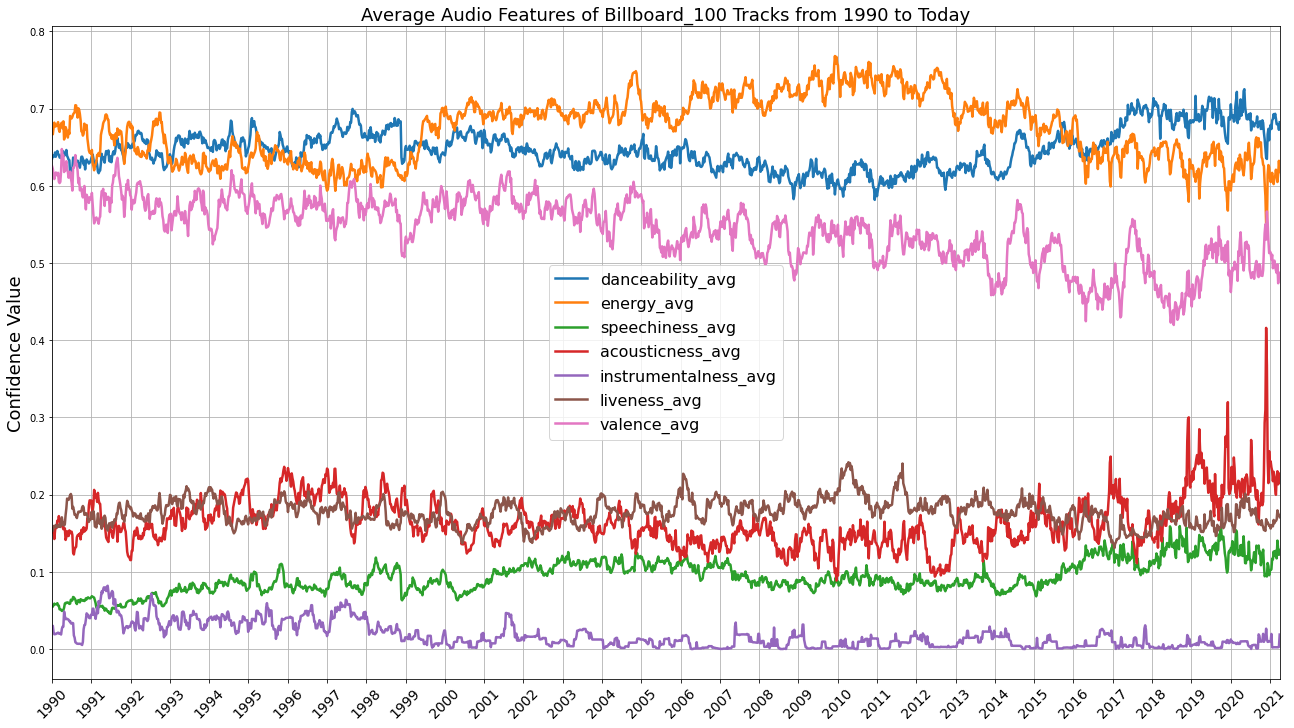

In [7]:
plt.figure(figsize=(22,12))
y_vals = avg_features[['danceability_avg','energy_avg','speechiness_avg','acousticness_avg',
                                   'instrumentalness_avg','liveness_avg','valence_avg']]
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]

plt.plot(x_vals, y_vals, label="Audio Features", linewidth=2.5)
plt.legend([i for i in y_vals], loc='center', fontsize=16)


plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix, x_tix_lab, rotation=45, fontsize=14)
plt.yticks()
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Audio Features of Billboard_100 Tracks from 1990 to Today', fontsize=18)


plt.grid(zorder=3)
plt.show()

In [8]:
avg_features.head()

,danceability_avg,energy_avg,loudness_avg,speechiness_avg,acousticness_avg,instrumentalness_avg,liveness_avg,valence_avg,tempo_avg,week
0,0.635219,0.672281,-9.773062,0.054600,0.154677,0.029802,0.155859,0.625260,115.922844,1990-01-06
1,0.638968,0.666684,-9.781326,0.055008,0.151400,0.030139,0.153061,0.621674,116.558505,1990-01-13
2,0.639589,0.675137,-9.552053,0.057159,0.151506,0.021584,0.159429,0.613589,116.782663,1990-01-20
3,0.637883,0.681745,-9.437330,0.058898,0.142577,0.019172,0.159479,0.608713,117.435128,1990-01-27
4,0.643105,0.676611,-9.439842,0.057981,0.153985,0.019497,0.157777,0.613432,118.637379,1990-02-03


# Instrumentalness

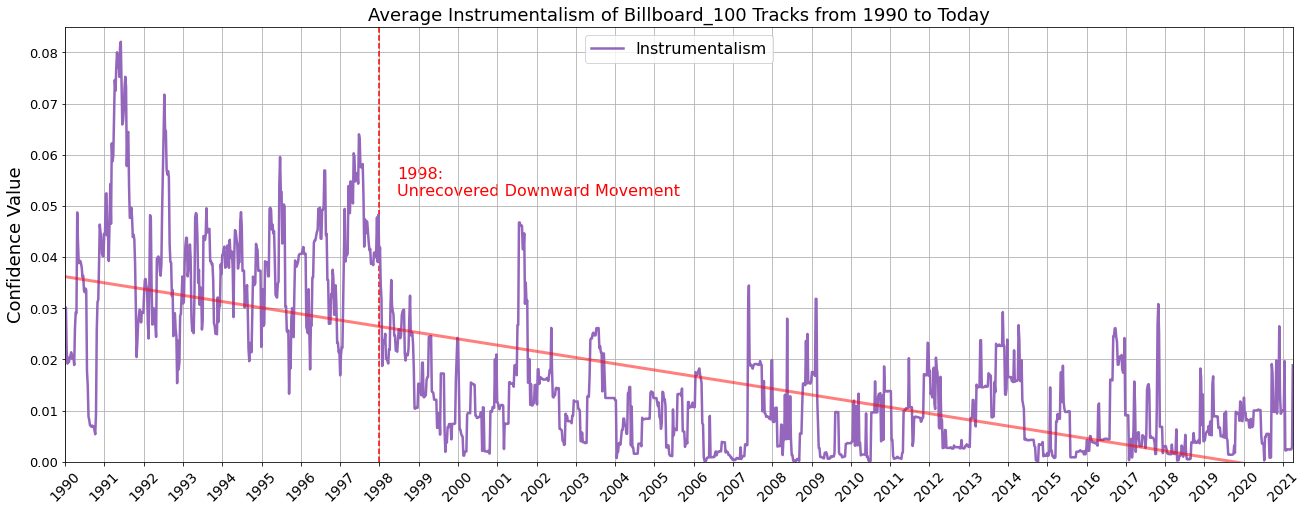

In [9]:
plt.figure(figsize=(22,8))
y_vals = avg_features['instrumentalness_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]


low_res_y = [j for i,j in enumerate(y_vals) if i%52==0]
low_res_x = [j for i,j in enumerate(x_vals) if i%52==0]

plt.plot(x_vals, y_vals, label="Instrumentalism", linewidth=2.5, color='#9467bd', alpha=1)

plt.legend(loc='upper center', fontsize=16)

plt.vlines(x_tix[8], color='red', ymin=0, ymax=0.085, linestyles='dashed')


x_lin = np.array(pd.to_datetime(x_vals).values, dtype=float)
y_lin = np.array(y_vals.values, dtype=float)
slope, intercept, r_val, p_val, std_err = sp.linregress(x_lin, y_lin)
xf = np.linspace(min(x_lin),max(x_lin),100)
xf1 = pd.to_datetime(xf)
yf = (slope*xf) + intercept


plt.plot(xf1, yf,color='red', lw=3, alpha=0.5)


plt.ylim(0, 0.085)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix, x_tix_lab, rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Instrumentalism of Billboard_100 Tracks from 1990 to Today', fontsize=18)
plt.text(10400, color='red', y=0.052,s='1998:\nUnrecovered Downward Movement', fontsize=16, zorder=1)

plt.grid(zorder=3)
plt.show()

# Speechiness

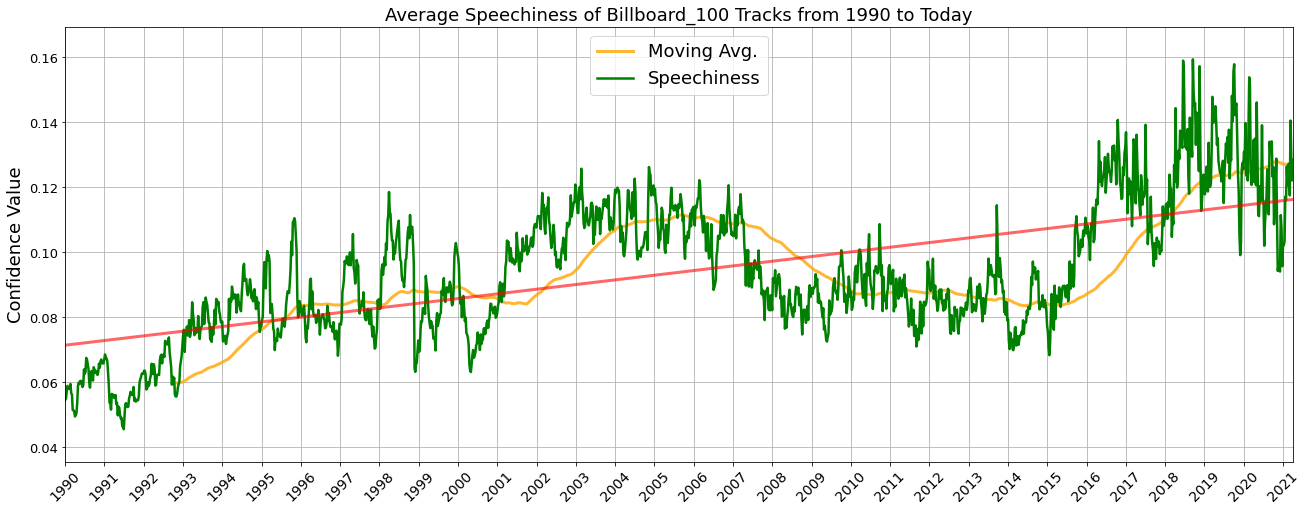

In [138]:
plt.figure(figsize=(22,8))
y_vals = avg_features['speechiness_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]

roll_avg = avg_features['speechiness_avg'].rolling(150).mean()
plt.plot(x_vals, roll_avg, label='Moving Avg.', linewidth=3, color='orange', alpha=0.8)

low_res_y = [j for i,j in enumerate(y_vals) if i%52==0]
low_res_x = [j for i,j in enumerate(x_vals) if i%52==0]

plt.plot(x_vals, y_vals, label="Speechiness", linewidth=2.5, color='green', alpha=1)

plt.legend(loc='upper center', fontsize=18)


x_lin = np.array(pd.to_datetime(avg_features['week']).values, dtype=float)
y_lin = np.array(avg_features['speechiness_avg'].values, dtype=float)

slope, intercept, r_val, p_val, std_err = sp.linregress(x_lin, y_lin)
xf = np.linspace(min(x_lin), max(x_lin),100)
xf1 = pd.to_datetime(xf)
yf = (slope*xf) + intercept

plt.plot(xf1, yf, color='red', lw=3, alpha=0.6)


plt.ylim(min(y_vals)-0.01, max(y_vals)+0.01)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix, x_tix_lab, rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Speechiness of Billboard_100 Tracks from 1990 to Today', fontsize=18)

plt.grid(zorder=3)
plt.show()

# Liveness

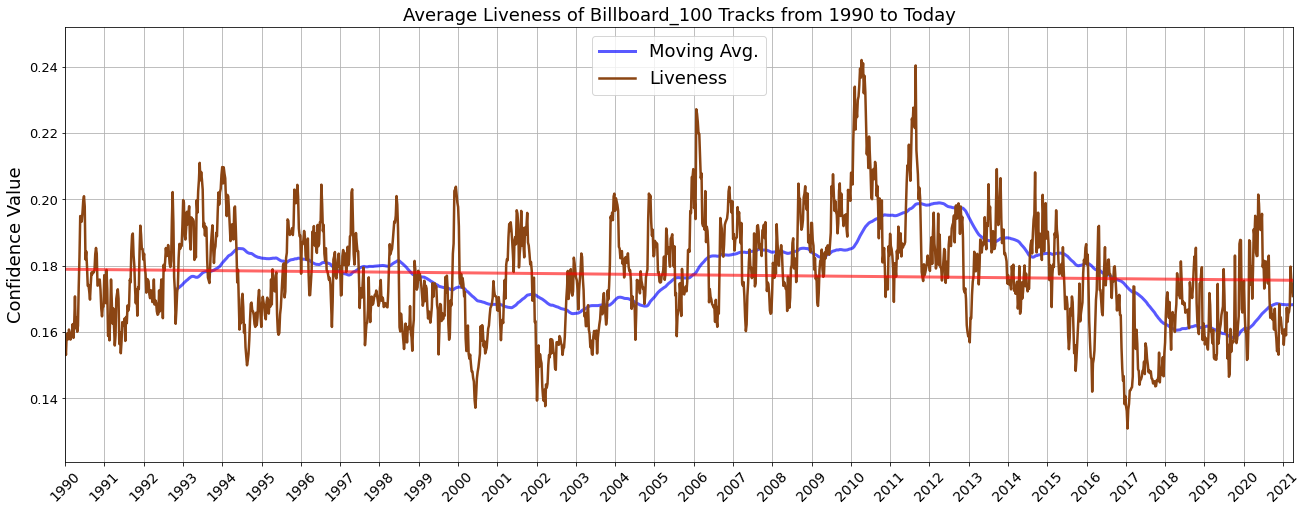

In [152]:
plt.figure(figsize=(22,8))
y_vals = avg_features['liveness_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]


low_res_y = [j for i,j in enumerate(y_vals) if i%52==0]
low_res_x = [j for i,j in enumerate(x_vals) if i%52==0]

roll_avg = avg_features['liveness_avg'].rolling(150).mean()
plt.plot(x_vals, roll_avg, label='Moving Avg.', linewidth=3, color='blue', alpha=0.65)

plt.plot(x_vals, y_vals, label="Liveness", linewidth=2.5, color='saddlebrown', alpha=1)

plt.legend(loc='upper center', fontsize=18)


x_lin = np.array(pd.to_datetime(avg_features['week']).values, dtype=float)
y_lin = np.array(avg_features['liveness_avg'].values, dtype=float)

slope, intercept, r_val, p_val, std_err = sp.linregress(x_lin, y_lin)
xf = np.linspace(min(x_lin), max(x_lin),100)
xf1 = pd.to_datetime(xf)
yf = (slope*xf) + intercept

plt.plot(xf1, yf, color='red', lw=3, alpha=0.6)


plt.ylim(min(y_vals)-0.01, max(y_vals)+0.01)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix, x_tix_lab, rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Liveness of Billboard_100 Tracks from 1990 to Today', fontsize=18)

plt.grid(zorder=3)
plt.show()

In [12]:
liveness_range = avg_features[(avg_features['week'] >= '2002-01-01')&
                             (avg_features['week'] <='2012-01-01')].reset_index(drop=True)

In [13]:
liveness_range['liveness_avg'].describe()

count    522.000000
mean       0.183720
std        0.018821
min        0.137612
25%        0.172240
50%        0.182652
75%        0.193997
max        0.241999
Name: liveness_avg, dtype: float64

In [14]:
peaks = []
valleys = []
for i in range(2002,2012):
    x = avg_features[(avg_features['week'] > f"{i}-01-01")&(avg_features['week'] < f"{i+1}-01-01")]
    
    peaks.append((max(list(x['liveness_avg'])), x['week'].loc[(x['liveness_avg']==max(x['liveness_avg']))]))
    valleys.append((min(list(x['liveness_avg'])), x['week'].loc[(x['liveness_avg']==min(x['liveness_avg']))]))
    

In [15]:
line = []

for i in range(2002,2013):
    x = avg_features[(avg_features['week'] > f"{i}-01-01")&(avg_features['week'] < f"{i+1}-01-01")]
    
    min_week = (x['week'].loc[(x['liveness_avg']==min(x['liveness_avg']))], x['week'].loc[(x['liveness_avg']==min(x['liveness_avg']))].index)
    max_week = (x['week'].loc[(x['liveness_avg']==max(x['liveness_avg']))], x['week'].loc[(x['liveness_avg']==max(x['liveness_avg']))].index)
    
    if min_week[1] < max_week[1]:
        line.append((min(list(x['liveness_avg'])), min_week[0]))
        line.append((max(list(x['liveness_avg'])), max_week[0]))
    else:
        line.append((max(list(x['liveness_avg'])), max_week[0]))
        line.append((min(list(x['liveness_avg'])), min_week[0]))

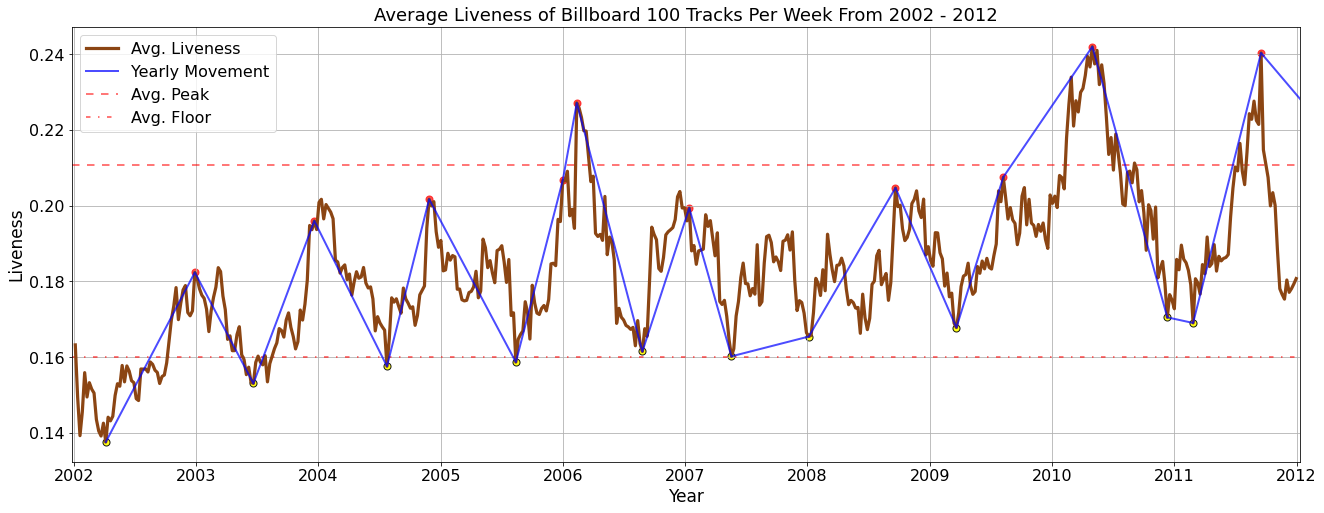

In [63]:
plt.figure(figsize=(22,8))

avg_peak = np.mean([i[0] for i in peaks])
avg_valley = np.mean([i[0] for i in valleys])

x_vals = liveness_range['week']
y_vals = liveness_range['liveness_avg']

plt.plot(x_vals, y_vals, linewidth=3.2, color='saddlebrown', label='Avg. Liveness')

plt.scatter([i[1] for i in peaks], [i[0] for i in peaks], marker='o' ,color='red', s=50, alpha=0.7)
plt.scatter([i[1] for i in valleys], [i[0] for i in valleys], marker='o', color='yellow', edgecolors='black', s=50, alpha=0.9)

plt.plot([i[1] for i in line], [i[0] for i in line], color='blue', linewidth=2, alpha=0.7, label='Yearly Movement')

plt.hlines(avg_peak, min(x_vals)-timedelta(days=10),max(x_vals)+timedelta(days=10), color='r', linestyles=(0,(5,5)), alpha=0.7, label='Avg. Peak')
plt.hlines(avg_valley, min(x_vals)-timedelta(days=10),max(x_vals)+timedelta(days=10), color='r', linestyles=(0,(3,5,1,5)), alpha=0.7, label='Avg. Floor')

plt.title('Average Liveness of Billboard 100 Tracks Per Week From 2002 - 2012', fontsize=18)
plt.xlabel('Year',fontsize=17)
plt.ylabel('Liveness',fontsize=17)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlim(min(x_vals)-timedelta(days=10),max(x_vals)+timedelta(days=10))

plt.legend(fontsize=16)
plt.grid(zorder=3)
plt.show()

In [17]:
last_10years = avg_features[avg_features['week'] >= '2010-01-01'].reset_index(drop=True)
last_10years['week']

0     2010-01-02
1     2010-01-09
2     2010-01-16
3     2010-01-23
4     2010-01-30
         ...    
587   2021-04-03
588   2021-04-10
589   2021-04-17
590   2021-04-24
591   2021-05-01
Name: week, Length: 592, dtype: datetime64[ns]

# Acousticness

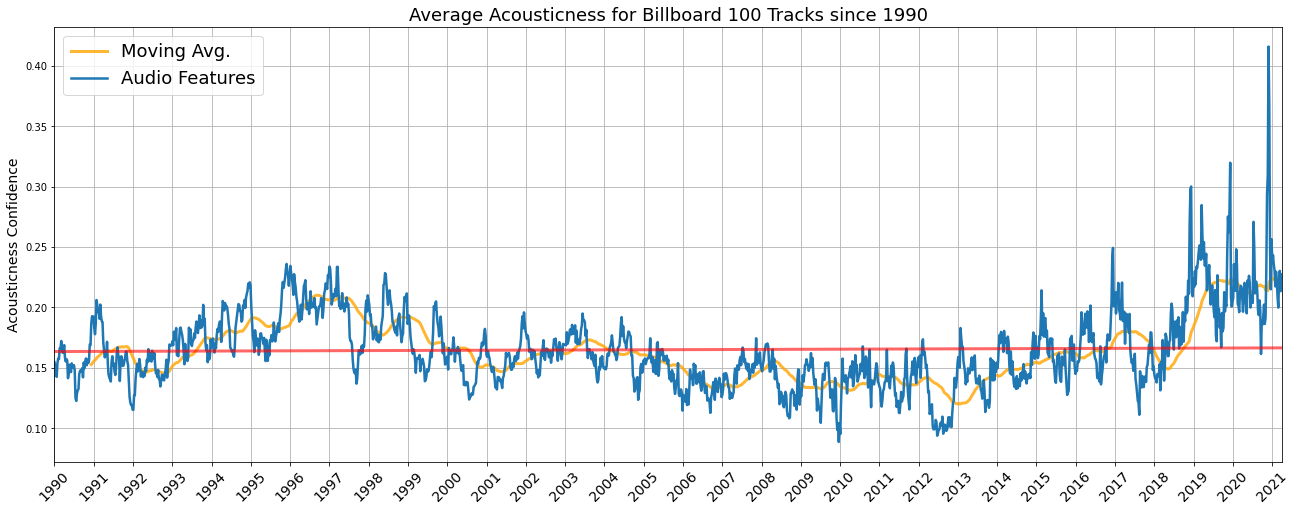

In [150]:
plt.figure(figsize=(22,8))

y_vals = avg_features['acousticness_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]

roll_avg = avg_features['acousticness_avg'].rolling(50).mean()
plt.plot(x_vals, roll_avg, label='Moving Avg.', linewidth=3, color='orange', alpha=0.8)

plt.plot(avg_features['week'], y_vals, label="Audio Features", linewidth=2.5)

y = np.array(avg_features['acousticness_avg'].values, dtype=float)
x = np.array(pd.to_datetime(avg_features['week']).values, dtype=float)
slope, intercept, r_value, p_value, std_err = sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)

xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)

yf = (slope*xf)+intercept

plt.plot(xf1, yf, color='red', lw=3, alpha=0.6)

plt.title('Average Acousticness for Billboard 100 Tracks since 1990', fontsize=18)
plt.ylabel('Acousticness Confidence', fontsize=14)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix, x_tix_lab, rotation=45, fontsize=14)
plt.legend(fontsize=18)
plt.grid(zorder=3)
plt.show()

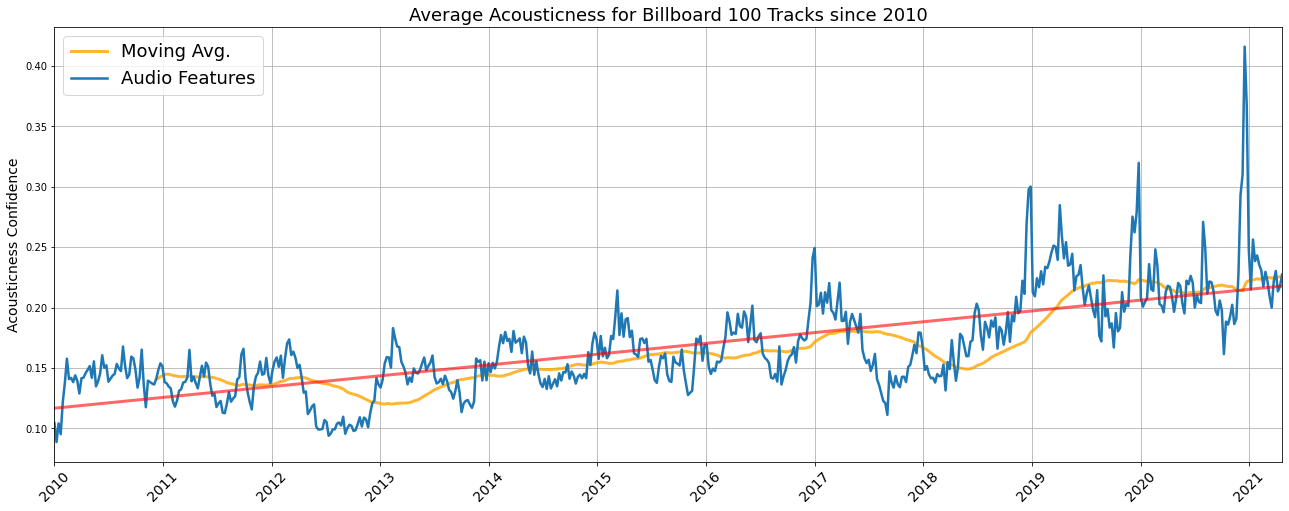

In [151]:
plt.figure(figsize=(22,8))

y_vals = last_10years['acousticness_avg']
x_vals = [i for i in last_10years['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]

roll_avg = last_10years['acousticness_avg'].rolling(50).mean()
plt.plot(x_vals, roll_avg, label='Moving Avg.', linewidth=3, color='orange', alpha=0.8)

plt.plot(last_10years['week'], y_vals, label="Audio Features", linewidth=2.5)

y = np.array(last_10years['acousticness_avg'].values, dtype=float)
x = np.array(pd.to_datetime(last_10years['week']).values, dtype=float)
slope, intercept, r_value, p_value, std_err = sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)

xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)

yf = (slope*xf)+intercept

plt.plot(xf1, yf, color='red', lw=3, alpha=0.6)

plt.title('Average Acousticness for Billboard 100 Tracks since 2010', fontsize=18)
plt.ylabel('Acousticness Confidence', fontsize=14)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix, x_tix_lab, rotation=45, fontsize=14)
plt.legend(fontsize=18)
plt.grid(zorder=3)
plt.show()

# Valence

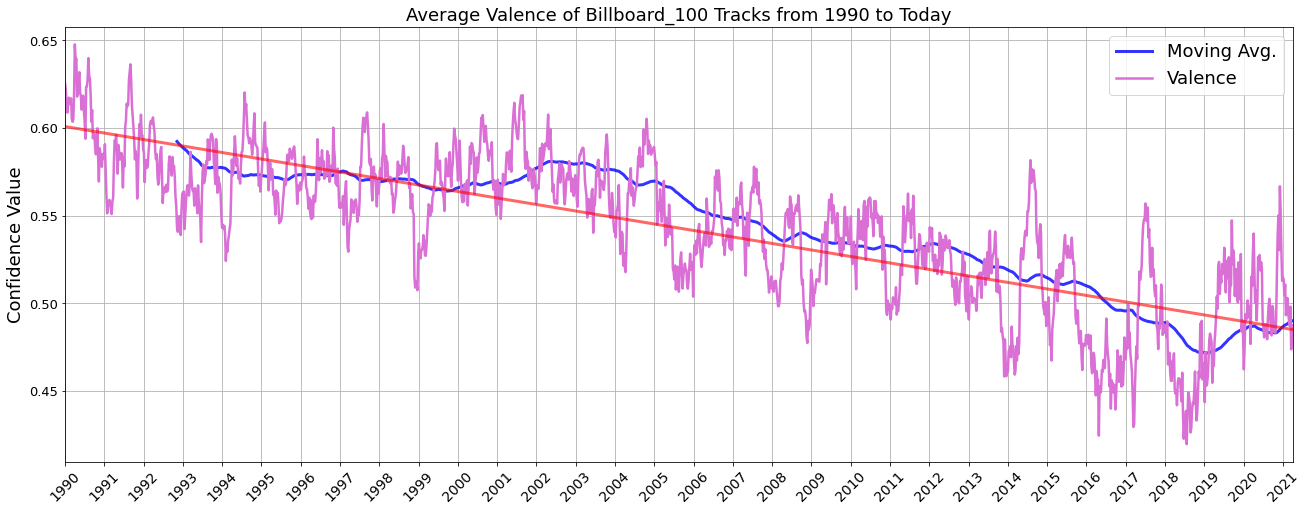

In [155]:
plt.figure(figsize=(22,8))
y_vals = avg_features['valence_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]


roll_avg = avg_features['valence_avg'].rolling(150).mean()
plt.plot(x_vals, roll_avg, label='Moving Avg.', linewidth=3, color='blue', alpha=0.8)

low_res_y = [j for i,j in enumerate(y_vals) if i%52==0]
low_res_x = [j for i,j in enumerate(x_vals) if i%52==0]

plt.plot(x_vals, y_vals, label="Valence", linewidth=2.5, color='orchid', alpha=1)

plt.legend(loc='upper right', fontsize=18)


x_lin = np.array(pd.to_datetime(avg_features['week']).values, dtype=float)
y_lin = np.array(avg_features['valence_avg'].values, dtype=float)

slope, intercept, r_val, p_val, std_err = sp.linregress(x_lin, y_lin)
xf = np.linspace(min(x_lin), max(x_lin),100)
xf1 = pd.to_datetime(xf)
yf = (slope*xf) + intercept

plt.plot(xf1, yf, color='red', lw=3, alpha=0.6)


plt.ylim(min(y_vals)-0.01, max(y_vals)+0.01)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix,[i for i in x_tix_lab], rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Valence of Billboard_100 Tracks from 1990 to Today', fontsize=18)

plt.grid(zorder=3)
plt.show()

In [20]:
def valence_change(df, year_floor=1990, year_cap=2020):
    min_max_peryear = {'year':[],
                      'min_valence':[],
                      'max_valence':[]}

    for i in range(year_floor,year_cap):
        one_year = df['valence_avg'][(df['week']>f"{i}-01-01") &
                                              (df['week'] <= f"{i+1}-01-01")]
        min_max_peryear['year'].append(i)
        min_max_peryear['min_valence'].append(min(one_year))
        min_max_peryear['max_valence'].append(max(one_year))
    return min_max_peryear


In [21]:
happiness_change = pd.DataFrame(valence_change(avg_features))
happiness_change['abs_change'] = happiness_change['max_valence'] - happiness_change['min_valence']
happiness_change

,year,min_valence,max_valence,abs_change
0,1990,0.569458,0.647611,0.078153
1,1991,0.550895,0.636237,0.085342
2,1992,0.538938,0.605960,0.067021
3,1993,0.534949,0.596697,0.061748
4,1994,0.524199,0.620199,0.096000
5,1995,0.545717,0.603133,0.057416
6,1996,0.548035,0.600170,0.052135
7,1997,0.529459,0.608837,0.079378
8,1998,0.509078,0.602240,0.093162
9,1999,0.507487,0.599598,0.092111


In [22]:
happiness_change[['min_valence','max_valence','abs_change']].describe()


,min_valence,max_valence,abs_change
count,30.000000,30.000000,30.000000
mean,0.504591,0.581195,0.076604
std,0.042379,0.037322,0.019524
min,0.419758,0.489705,0.044227
25%,0.479927,0.560652,0.066795
50%,0.507068,0.592710,0.073447
75%,0.539916,0.605768,0.085038
max,0.569458,0.647611,0.127390


In [23]:
# 1990-2021 Valence Averages
print(f"Average Mean-Value for Valence: {avg_features['valence_avg'].mean()}\n"
      f"Average Change/Year: {happiness_change['abs_change'].mean()}\n"
      f"Average Percent Change/Year: {round(100 * happiness_change['abs_change'].mean()/avg_features['valence_avg'].mean(), 2)}%")

Average Mean-Value for Valence: 0.5429158804132908
Average Change/Year: 0.07660363818554236
Average Percent Change/Year: 14.11%


In [24]:
pre_volatility = avg_features[avg_features['week'] <= '2014-01-01']
happiness_filtered = pd.DataFrame(valence_change(avg_features,1990, 2014))
happiness_filtered['abs_change'] = happiness_filtered['max_valence'] - happiness_filtered['min_valence']

# 1990-2014 Valence Averages
print(f"Average Mean-Value for Valence: {pre_volatility['valence_avg'].mean()}\n"
      f"Average Change/Year: {happiness_filtered['abs_change'].mean()}\n"
      f"Average Percent Change/Year: {round(100 * happiness_filtered['abs_change'].mean()/avg_features['valence_avg'].mean(), 2)}%")

Average Mean-Value for Valence: 0.558598218572103
Average Change/Year: 0.07210188106526132
Average Percent Change/Year: 13.28%


In [25]:
pre_volatility = avg_features[(avg_features['week'] >= '2014-01-01')]
happiness_filtered = pd.DataFrame(valence_change(avg_features, 2014))
happiness_filtered['abs_change'] = happiness_filtered['max_valence'] - happiness_filtered['min_valence']

# 2014-Today Valence Averages
print(f"Average Mean-Value for Valence: {pre_volatility['valence_avg'].mean()}\n"
      f"Average Change/Year: {happiness_filtered['abs_change'].mean()}\n"
      f"Average Percent Change/Year: {round(100 * happiness_filtered['abs_change'].mean()/avg_features['valence_avg'].mean(), 2)}%")

Average Mean-Value for Valence: 0.4916923685681884
Average Change/Year: 0.09461066666666652
Average Percent Change/Year: 17.43%


# Danceability

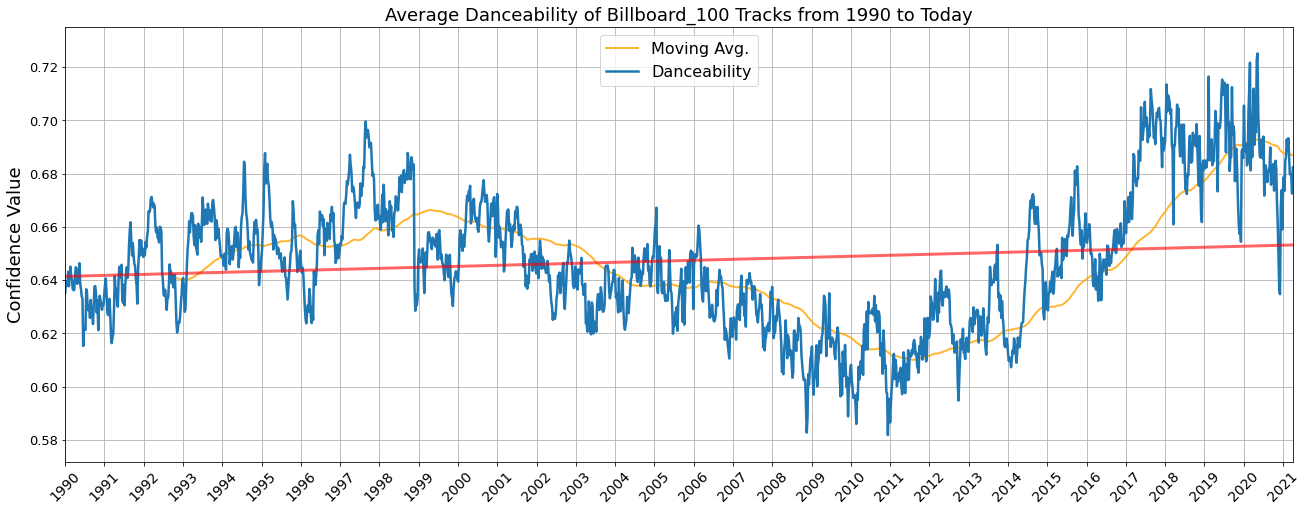

In [51]:
plt.figure(figsize=(22,8))
y_vals = avg_features['danceability_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]

roll_avg = avg_features['danceability_avg'].rolling(150).mean()
plt.plot(x_vals, roll_avg, label='Moving Avg.', linewidth=2, color='orange', alpha=0.8)


low_res_y = [j for i,j in enumerate(y_vals) if i%52==0]
low_res_x = [j for i,j in enumerate(x_vals) if i%52==0]

plt.plot(x_vals, y_vals, label="Danceability", linewidth=2.5, color='C0', alpha=1)

plt.legend(loc='upper center', fontsize=16)


x_lin = np.array(pd.to_datetime(avg_features['week']).values, dtype=float)
y_lin = np.array(avg_features['danceability_avg'].values, dtype=float)

slope, intercept, r_val, p_val, std_err = sp.linregress(x_lin, y_lin)
xf = np.linspace(min(x_lin), max(x_lin),100)
xf1 = pd.to_datetime(xf)
yf = (slope*xf) + intercept

plt.plot(xf1, yf, color='red', lw=3, alpha=0.6)


plt.ylim(min(y_vals)-0.01, max(y_vals)+0.01)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix,[i for i in x_tix_lab], rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Danceability of Billboard_100 Tracks from 1990 to Today', fontsize=18)

plt.grid(zorder=3)
plt.show()

In [27]:
all_tracks_exploded = all_tracks_exploded.dropna()
all_tracks_exploded['peak_rank'] = pd.to_numeric(all_tracks_exploded['peak_rank'])
x = all_tracks_exploded[all_tracks_exploded['peak_rank']<=10].mean()['danceability']
y = all_tracks_exploded[all_tracks_exploded['peak_rank']>=10].mean()['danceability']
print(f"Avg. Danceability for Tracks with Peak Rank 1-10: {x}\n"
     f"Avg. Danceability for Tracks with Peak Ranks lower than 10: {y}")

<ipython-input-27-24c3c272519f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_tracks_exploded['peak_rank'] = pd.to_numeric(all_tracks_exploded['peak_rank'])
<ipython-input-27-24c3c272519f>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  x = all_tracks_exploded[all_tracks_exploded['peak_rank']<=10].mean()['danceability']
<ipython-input-27-24c3c272519f>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  y = all_tracks_exploded[all_tracks_exploded['peak_rank']>=10].mean()['danceability']


Avg. Danceability for Tracks with Peak Rank 1-10: 0.6705788325849904
Avg. Danceability for Tracks with Peak Ranks lower than 10: 0.6460654726895508


# Energy

In [111]:
dance = avg_features['danceability_avg'].rolling(75).mean()
energy = avg_features['energy_avg'].rolling(75).mean()
together = pd.DataFrame({'dance':dance,
                       'energy':energy,
                       'week':avg_features['week']})
together = together.dropna()
cross_points = [(i['week'], i['dance']) for h,i in together.iterrows() if round(i['dance'],3)==round(i['energy'],3)]
cross_points

[(Timestamp('1993-06-26 00:00:00'), 0.6484758502180255),
 (Timestamp('2000-02-12 00:00:00'), 0.6527048294474694),
 (Timestamp('2016-12-31 00:00:00'), 0.6540374666666667)]

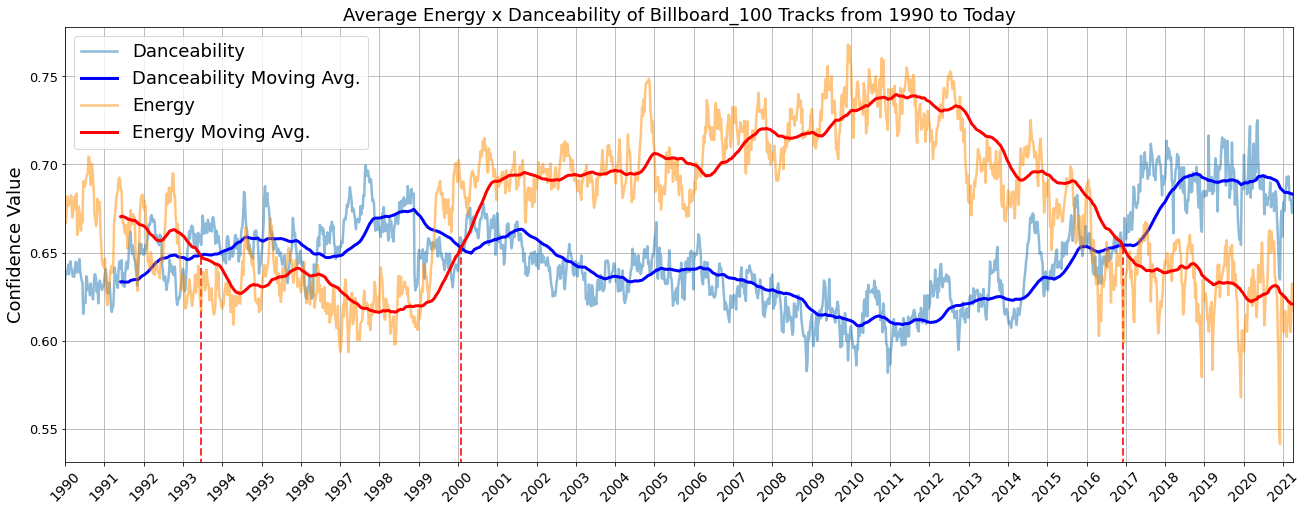

In [122]:
rolling_window = 75
d_y_vals = avg_features['danceability_avg']
d_y_rolling = avg_features['danceability_avg'].rolling(rolling_window).mean()
e_y_rolling = avg_features['energy_avg'].rolling(rolling_window).mean()


plt.figure(figsize=(22,8))
y_vals = avg_features['energy_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]

low_res_y = [j for i,j in enumerate(y_vals) if i%52==0]
low_res_x = [j for i,j in enumerate(x_vals) if i%52==0]

plt.plot(x_vals, d_y_vals, label='Danceability', linewidth=2.5, alpha=0.5)
plt.plot(x_vals, d_y_rolling, linewidth=3, color='blue', label='Danceability Moving Avg.')

plt.plot(x_vals, y_vals, label="Energy", linewidth=2.5, color='darkorange', alpha=0.5)

plt.plot(x_vals, e_y_rolling, linewidth=3, color='red',label='Energy Moving Avg.')
plt.legend(loc='upper left', fontsize=18)

for i in range(len(cross_points)):
    plt.vlines(cross_points[i][0], linewidth=2, color="red", alpha=0.8, ymin=0, ymax=cross_points[i][1], linestyles='dashed')


plt.ylim(min(y_vals)-0.01, max(y_vals)+0.01)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix,[i for i in x_tix_lab], rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Energy x Danceability of Billboard_100 Tracks from 1990 to Today', fontsize=18)

plt.grid(zorder=3)
plt.show()

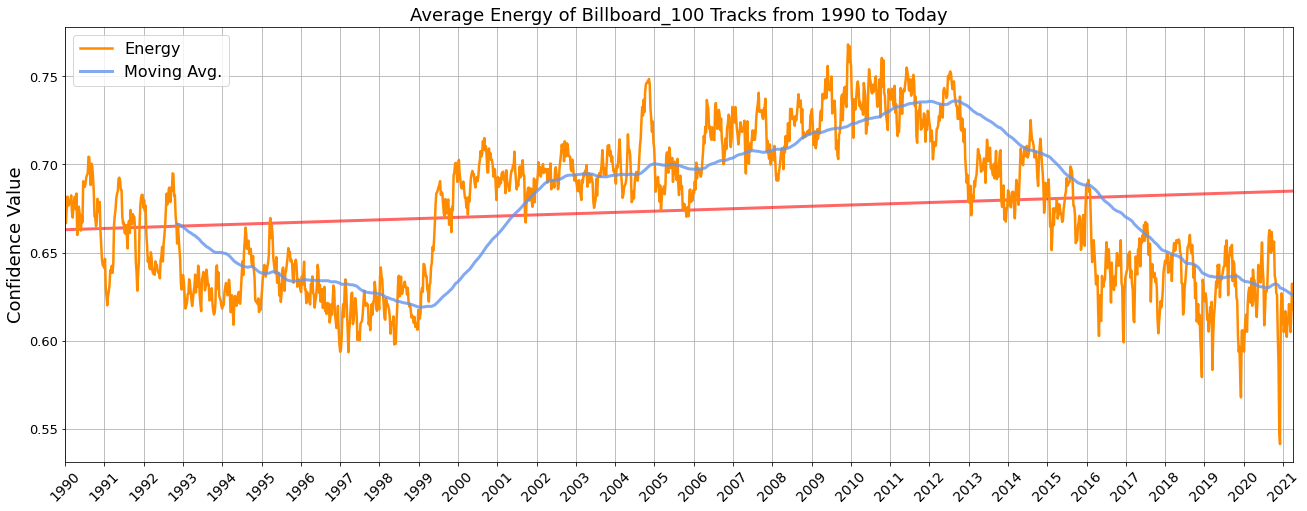

In [123]:
plt.figure(figsize=(22,8))
y_vals = avg_features['energy_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]
roll_avg = avg_features['energy_avg'].rolling(150).mean()


x_lin = np.array(pd.to_datetime(avg_features['week']).values, dtype=float)
y_lin = np.array(avg_features['energy_avg'].values, dtype=float)

slope, intercept, r_val, p_val, std_err = sp.linregress(x_lin, y_lin)
xf = np.linspace(min(x_lin), max(x_lin),100)
xf1 = pd.to_datetime(xf)
yf = (slope*xf) + intercept

plt.plot(xf1, yf, color='red', lw=3, alpha=0.6)
plt.plot(x_vals, y_vals, label="Energy", linewidth=2.5, color='darkorange', alpha=1)
plt.plot(x_vals, roll_avg, label='Moving Avg.', linewidth=3, color='cornflowerblue', alpha=0.8)
plt.legend(loc='upper left', fontsize=16)


plt.ylim(min(y_vals)-0.01, max(y_vals)+0.01)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix,[i for i in x_tix_lab], rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Energy of Billboard_100 Tracks from 1990 to Today', fontsize=18)

plt.grid(zorder=3)
plt.show()

In [125]:
twen15_to_today = avg_features[avg_features['week']>='2015-01-01']


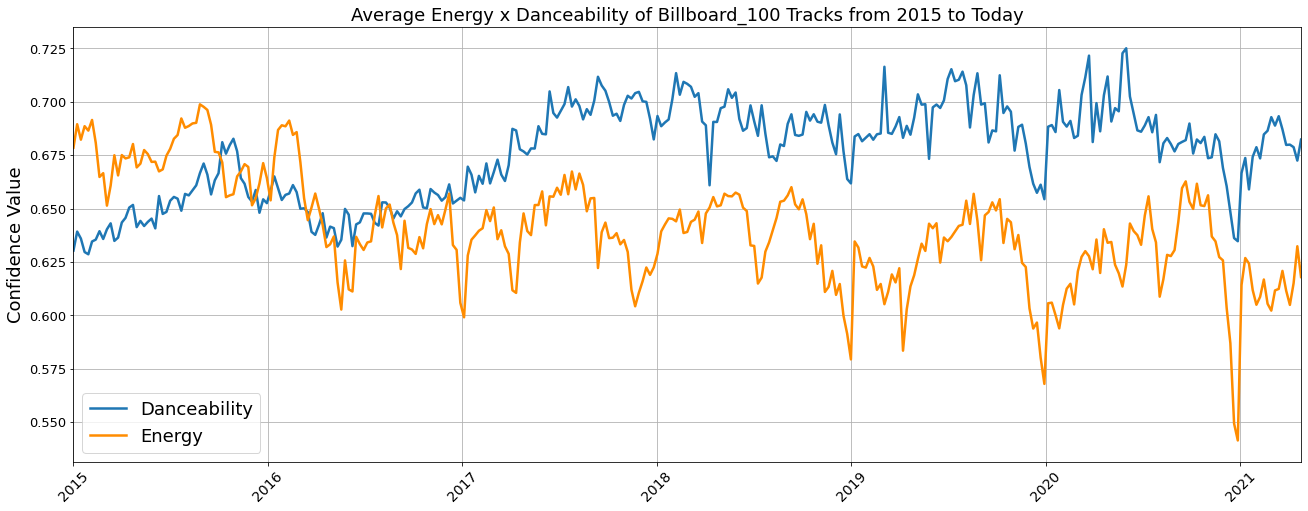

In [134]:

plt.figure(figsize=(22,8))
energy = twen15_to_today['energy_avg']
dance = twen15_to_today['danceability_avg']
x_vals = [i for i in twen15_to_today['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]

low_res_y = [j for i,j in enumerate(y_vals) if i%52==0]
low_res_x = [j for i,j in enumerate(x_vals) if i%52==0]

plt.plot(x_vals, dance, label='Danceability', linewidth=2.5, alpha=1)

plt.plot(x_vals, energy, label="Energy", linewidth=2.5, color='darkorange', alpha=1)

plt.legend(loc='lower left', fontsize=18)


plt.ylim(min(energy)-0.01, max(dance)+0.01)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix,[i for i in x_tix_lab], rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Energy x Danceability of Billboard_100 Tracks from 2015 to Today', fontsize=18)

plt.grid(zorder=3)
plt.show()

In [29]:
#peak energy week in 2009
avg_features['week'][avg_features['energy_avg']==max(avg_features['energy_avg'])]

1041   2009-12-26
Name: week, dtype: datetime64[ns]

In [30]:
energy = all_tracks_exploded[(all_tracks_exploded['weeks'] =='2009-12-26')].sort_values('energy', ascending=False)
energy

,song,artist,peak_rank,total_weeks,weeks,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
6877,Twang,George Strait,100,1,2009-12-26,10Jl8nC5i4idX63nUk3mRj,0.561,0.956,-3.331,0.0799,0.279000,0.000007,0.0801,0.780,158.621
6810,If You Only Knew,Shinedown,92,7,2009-12-26,0CkSF2TAqIu8TJaVwwAOnT,0.449,0.956,-4.011,0.0398,0.000347,0.000000,0.3250,0.321,97.011
6734,Empire State Of Mind,Jay-Z + Alicia Keys,50,14,2009-12-26,2igwFfvr1OAGX9SKDCPBwO,0.491,0.956,-1.538,0.3920,0.029500,0.000000,0.4600,0.811,173.585
6725,I Will Not Bow,Breaking Benjamin,40,15,2009-12-26,2yXyz4NLTZx9CLdXfLTp5E,0.533,0.955,-3.708,0.0653,0.000165,0.000014,0.3800,0.550,107.984
6770,I Can Transform Ya,Chris Brown Featuring Lil Wayne & Swizz Beatz,52,10,2009-12-26,7n6TT5TDeS0A1DqEtSdapf,0.541,0.953,-4.229,0.1070,0.048000,0.000000,0.1920,0.856,111.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6688,Sexy Chick,David Guetta Featuring Akon,56,19,2009-12-26,4MKzCHlZvkwJOQRNkdw4zq,0.809,0.562,-7.694,0.0534,0.081600,0.000418,0.1050,0.798,130.003
6786,Papers,Usher,92,9,2009-12-26,77fP7UixHMYEIFT8NS92Ul,0.802,0.556,-5.395,0.0418,0.033900,0.000000,0.0958,0.158,120.047
6865,How Low,Ludacris,13,1,2009-12-26,1WtTLtofvcjQM3sXSMkDdX,0.785,0.498,-6.977,0.0533,0.002480,0.000001,0.2240,0.418,143.960
6800,Russian Roulette,Rihanna,100,8,2009-12-26,3rMsX63C0IZVnOT5LGYoTH,0.480,0.486,-5.754,0.0447,0.046000,0.000000,0.1070,0.265,80.051


In [31]:
energy[energy['energy'] >= 0.8].count()['song']

40

In [32]:
all_tracks_exploded = all_tracks.explode('weeks')
all_tracks_exploded['weeks'] = pd.to_datetime(all_tracks_exploded['weeks'])
all_tracks_exploded

,song,artist,peak_rank,total_weeks,weeks,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Another Day In Paradise,Phil Collins,1,9,1990-01-06,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.736000,0.002690,0.0630,0.365,101.967
0,Another Day In Paradise,Phil Collins,1,9,1990-01-13,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.736000,0.002690,0.0630,0.365,101.967
0,Another Day In Paradise,Phil Collins,1,9,1990-01-20,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.736000,0.002690,0.0630,0.365,101.967
0,Another Day In Paradise,Phil Collins,1,9,1990-01-27,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.736000,0.002690,0.0630,0.365,101.967
0,Another Day In Paradise,Phil Collins,1,9,1990-02-03,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.736000,0.002690,0.0630,0.365,101.967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12551,Paid The Fine,Young Thug & Gunna Featuring Lil Baby & YTB Tr...,77,1,2021-05-01,0GqaZ1L5KAXMNngAZbGvLf,0.484,0.596,-8.523,0.4240,0.029900,0.000000,0.1190,0.210,81.860
12552,Drunk (And I Don't Wanna Go Home),Elle King & Miranda Lambert,79,1,2021-05-01,0QULNNd9z5s35entfiiXoa,0.612,0.884,-4.400,0.0459,0.005160,0.000000,0.0997,0.626,119.991
12553,Chasing After You,Ryan Hurd With Maren Morris,91,1,2021-05-01,1ZIKpMTRPqhwAoVXWY3tXI,0.596,0.679,-6.395,0.0394,0.723000,0.000000,0.1160,0.479,131.912
12554,Go!,Moneybagg Yo Featuring BIG30,96,1,2021-05-01,4VYKA63F2fcQnsvfWUpzn9,0.822,0.631,-6.271,0.2540,0.002120,0.000000,0.2040,0.561,175.099


In [33]:
liveness_cycles = all_tracks_exploded[(all_tracks_exploded['weeks'] >= '2010-01-01') &
                                     (all_tracks_exploded['weeks'] <= '2010-06-01')].dropna()
f = liveness_cycles[['song','artist','weeks','spotify_id','liveness']][liveness_cycles['liveness']>0.4].sort_values('liveness', ascending=False)
f[['song','weeks']].groupby('weeks').count()

,song
weeks,
2010-01-02,9
2010-01-09,9
2010-01-16,10
2010-01-23,12
2010-01-30,12
2010-02-06,11
2010-02-13,13
2010-02-20,13
2010-02-27,16


In [34]:
liveness_sorted = avg_features.sort_values('liveness_avg', ascending=False)
liveness_sorted

,danceability_avg,energy_avg,loudness_avg,speechiness_avg,acousticness_avg,instrumentalness_avg,liveness_avg,valence_avg,tempo_avg,week
1059,0.60514,0.73123,-5.24400,0.092796,0.151549,0.001407,0.241999,0.547040,120.50709,2010-05-01
1061,0.60441,0.72818,-5.26146,0.086001,0.155467,0.001384,0.241025,0.536000,119.69835,2010-05-15
1131,0.61189,0.73831,-5.27931,0.077504,0.142264,0.008828,0.240348,0.520407,120.84953,2011-09-17
1057,0.60537,0.73558,-5.10885,0.100780,0.145758,0.003691,0.239422,0.536730,120.73982,2010-04-17
1060,0.61530,0.73370,-5.15386,0.088580,0.141830,0.001406,0.237446,0.537150,120.93015,2010-05-08
...,...,...,...,...,...,...,...,...,...,...
1411,0.65759,0.63745,-6.56749,0.136938,0.212296,0.009059,0.137610,0.471436,121.52268,2017-01-28
545,0.66294,0.68694,-6.58768,0.069215,0.137515,0.009030,0.137135,0.568841,115.47206,2000-06-24
1414,0.67115,0.64929,-6.24375,0.121039,0.204049,0.009085,0.136593,0.499347,122.51715,2017-02-18
1412,0.66533,0.63960,-6.53461,0.128212,0.195004,0.009136,0.136176,0.477457,120.18118,2017-02-04


In [35]:
liveness_counts = all_tracks_exploded[(all_tracks_exploded['liveness']>0.4)].groupby('weeks').count()['song'].reset_index(drop=False)
liveness_counts = liveness_counts.rename(columns={'song':'hi_liveness_count'})
liveness_counts

,weeks,hi_liveness_count
0,1990-01-06,3
1,1990-01-13,2
2,1990-01-20,3
3,1990-01-27,3
4,1990-02-03,3
...,...,...
1620,2021-04-03,6
1621,2021-04-10,7
1622,2021-04-17,6
1623,2021-04-24,5


In [37]:
liveness_avg_counts = avg_features.merge(liveness_counts, how='right', left_on='week', right_on='weeks')
liveness_avg_counts = liveness_avg_counts.drop(['danceability_avg','energy_avg','loudness_avg',
                                                'speechiness_avg','acousticness_avg','instrumentalness_avg',
                                                'valence_avg','tempo_avg','weeks'], axis=1)
liveness_avg_counts.sort_values('hi_liveness_count', ascending=False)

,liveness_avg,week,hi_liveness_count
1061,0.241025,2010-05-15,18
1055,0.230984,2010-04-03,17
1064,0.232302,2010-06-05,17
1063,0.237211,2010-05-29,17
1057,0.239422,2010-04-17,17
...,...,...,...
1414,0.138294,2017-02-25,1
709,0.160254,2003-08-16,1
708,0.158297,2003-08-09,1
707,0.153502,2003-08-02,1


In [38]:
liveness_avg_counts['week'] = pd.to_datetime(liveness_avg_counts['week'])

In [39]:
liveness_avg_counts['hi_liveness_count'].describe()

count    1625.000000
mean        6.160000
std         2.829777
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        18.000000
Name: hi_liveness_count, dtype: float64

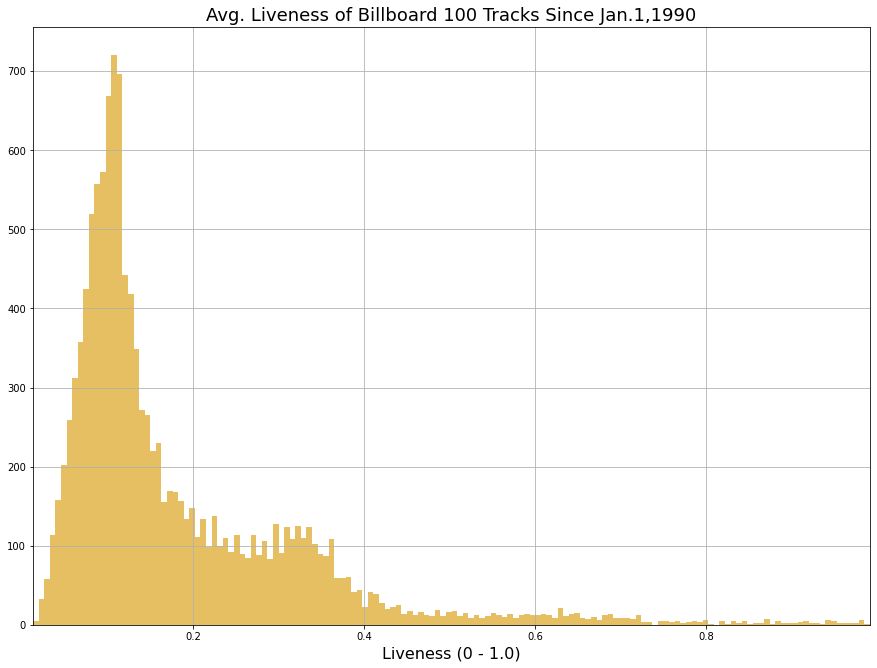

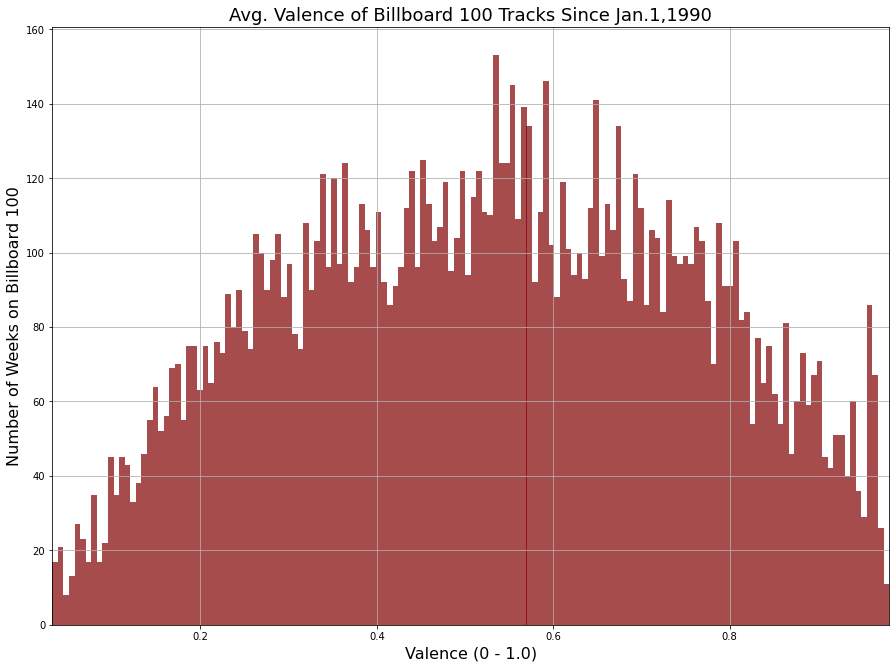

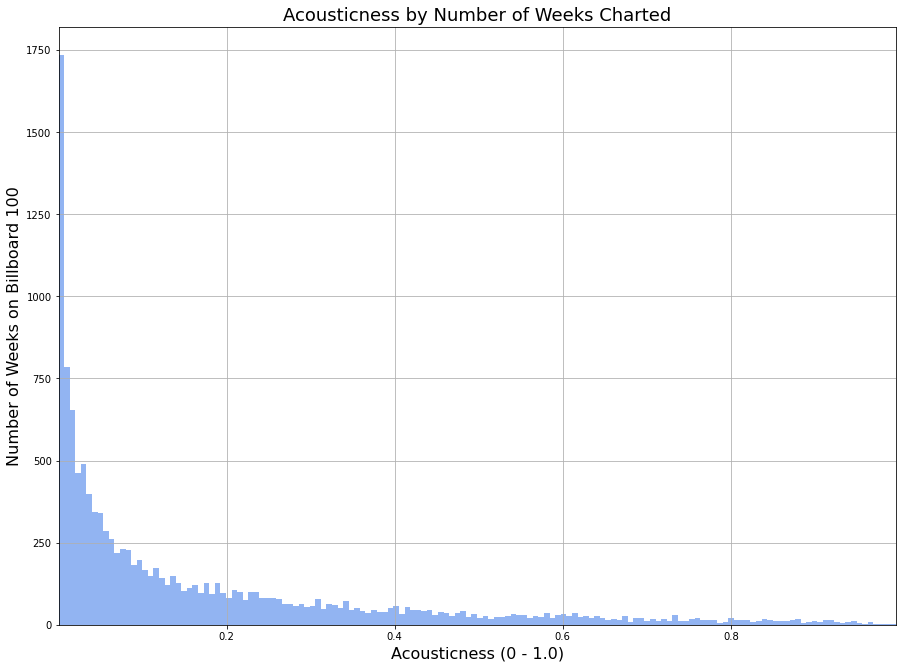

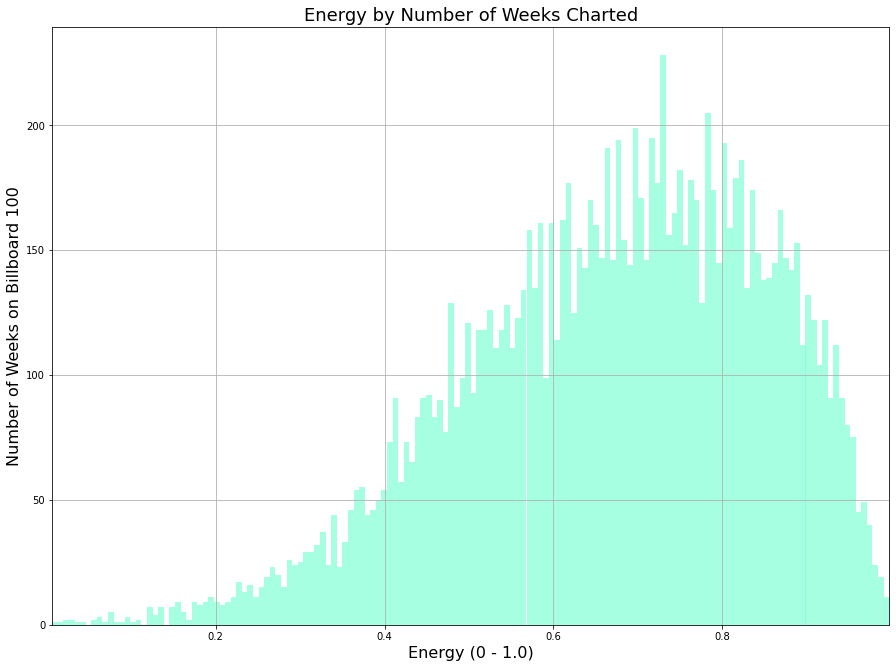

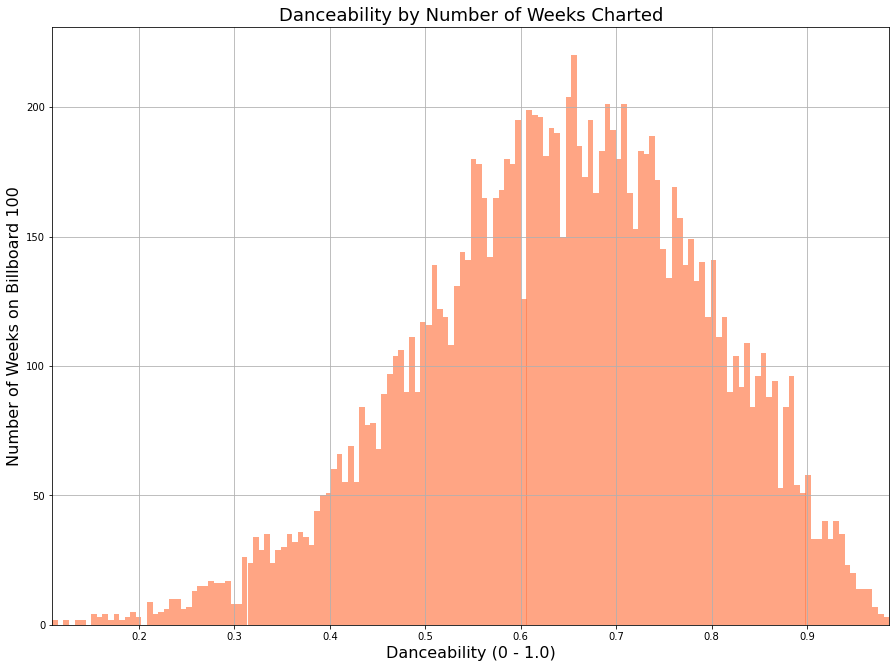

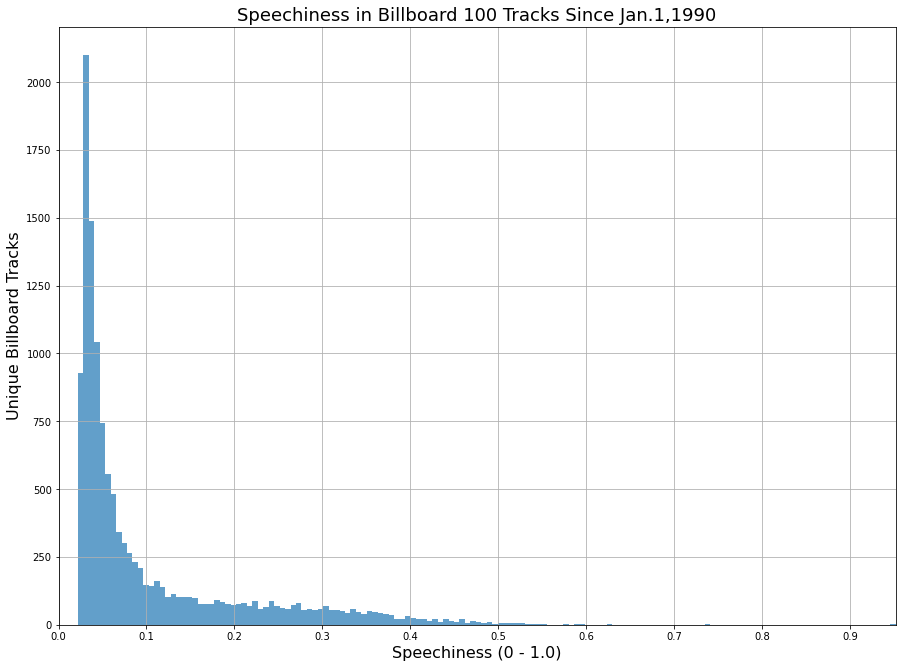

In [40]:
fig, ax = plt.subplots(figsize=(15,11))
fig, val = plt.subplots(figsize=(15,11))
fig, acous = plt.subplots(figsize=(15,11))
fig, eng = plt.subplots(figsize=(15,11))
fig, dance = plt.subplots(figsize=(15,11))
fig, speech = plt.subplots(figsize=(15,11))



liveness = all_tracks['liveness']
ax.hist(liveness, bins=150, alpha=0.7, color='goldenrod', histtype='stepfilled')
ax.grid(zorder=3)

ax.set_xlim(min(liveness), max(liveness))

ax.set_title('Avg. Liveness of Billboard 100 Tracks Since Jan.1,1990', fontsize=18)
ax.set_xlabel('Liveness (0 - 1.0)', fontsize=16)
acous.set_ylabel('Frequency', fontsize=16)


#-----------------------------------------------

valence = all_tracks['valence']
val.hist(valence, bins=150, alpha=0.7, color='maroon')
val.grid(zorder=3)


val.set_xlim(min(valence), max(valence))
val.set_title('Avg. Valence of Billboard 100 Tracks Since Jan.1,1990', fontsize=18)
val.set_xlabel('Valence (0 - 1.0)', fontsize=16)
val.set_ylabel('Number of Weeks on Billboard 100', fontsize=16)
#--------------------------------------------------

acoustic = all_tracks['acousticness']
acous.hist(acoustic, alpha=0.7, bins=150, color='cornflowerblue')
acous.grid(zorder=3)

acous.set_xlim(min(acoustic), max(acoustic))
acous.set_title('Acousticness by Number of Weeks Charted', fontsize=18)
acous.set_xlabel('Acousticness (0 - 1.0)', fontsize=16)
acous.set_ylabel('Number of Weeks on Billboard 100', fontsize=16)

#--------------------------------------------------

energy = all_tracks['energy']
eng.hist(energy, alpha=0.7, bins=150, color='aquamarine')
eng.grid(zorder=3)


eng.set_xlim(min(energy),max(energy))
eng.set_title('Energy by Number of Weeks Charted', fontsize=18)
eng.set_xlabel('Energy (0 - 1.0)', fontsize=16)
eng.set_ylabel('Number of Weeks on Billboard 100', fontsize=16)
#------------------------------------------------------

dancing = all_tracks['danceability']
dance.hist(dancing, alpha=0.7, bins=150, color='coral')
dance.grid(zorder=3)

dance.set_xlim(min(dancing),max(dancing))
dance.set_title('Danceability by Number of Weeks Charted', fontsize=18)
dance.set_xlabel('Danceability (0 - 1.0)', fontsize=16)
dance.set_ylabel('Number of Weeks on Billboard 100', fontsize=16)

#--------------------------------------------------------

speak = all_tracks['speechiness']
speech.hist(speak, alpha=0.7, bins=150)
speech.grid(zorder=3)

speech.set_xlim(min(speak),max(speak))
speech.set_title('Speechiness in Billboard 100 Tracks Since Jan.1,1990', fontsize=18)
speech.set_xticks(np.arange(0,1,step=0.1))
speech.set_xlabel('Speechiness (0 - 1.0)', fontsize=16)
speech.set_ylabel('Unique Billboard Tracks', fontsize=16)

plt.show()

In [41]:
all_tracks.tail()

,song,artist,peak_rank,total_weeks,weeks,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
12551,Paid The Fine,Young Thug & Gunna Featuring Lil Baby & YTB Tr...,77,1,['2021-05-01 00:00:00'],0GqaZ1L5KAXMNngAZbGvLf,0.484,0.596,-8.523,0.4240,0.029900,0.000000,0.1190,0.210,81.860
12552,Drunk (And I Don't Wanna Go Home),Elle King & Miranda Lambert,79,1,['2021-05-01 00:00:00'],0QULNNd9z5s35entfiiXoa,0.612,0.884,-4.400,0.0459,0.005160,0.000000,0.0997,0.626,119.991
12553,Chasing After You,Ryan Hurd With Maren Morris,91,1,['2021-05-01 00:00:00'],1ZIKpMTRPqhwAoVXWY3tXI,0.596,0.679,-6.395,0.0394,0.723000,0.000000,0.1160,0.479,131.912
12554,Go!,Moneybagg Yo Featuring BIG30,96,1,['2021-05-01 00:00:00'],4VYKA63F2fcQnsvfWUpzn9,0.822,0.631,-6.271,0.2540,0.002120,0.000000,0.2040,0.561,175.099
12555,Slatty,Young Thug & Gunna Featuring Yak Gotti & Lil Duke,99,1,['2021-05-01 00:00:00'],0ky8syPEVEfD7qCxMTW49X,0.814,0.531,-7.560,0.0884,0.000544,0.000007,0.1030,0.180,130.020


## The Weeks Column defaults to string since it is loaded from a .csv file - fixing that

In [42]:
x = all_tracks['weeks'].apply(lambda x: x.replace('[','')).apply(lambda x: x.replace(']','')).apply(lambda x: x.split(','))
all_tracks['weeks'] = x

AttributeError: 'list' object has no attribute 'replace'

In [ ]:
#all_tracks['weeks'] = all_tracks['weeks'].apply(lambda x: x.replace("'",""))
#all_tracks['weeks'] = pd.to_datetime(all_tracks['weeks'])
#all_tracks

In [ ]:
all_tracks_exploded = all_tracks.explode('weeks')

all_tracks_exploded['weeks'] = all_tracks_exploded['weeks'].apply(lambda x: x.replace("'","")).apply(lambda x: x.replace(' ',''))
all_tracks_exploded.reset_index().tail()

In [ ]:
all_tracks_exploded['weeks']

In [ ]:
loudness_by_week = all_tracks_exploded.groupby('weeks').mean()[['loudness','tempo']]
loudness_by_week =loudness_by_week.reset_index().sort_values('weeks')
loudness_by_week

In [ ]:
plt.figure(figsize=(16,11))
x_val = loudness_by_week['weeks']
y_val = loudness_by_week['loudness']


plt.plot(x_val, y_val, color='coral', alpha=0.8, linewidth=2.5)

plt.xlim(min(x_val), max(x_val))
plt.xticks([i for h,i in enumerate(x_val) if h==0 or h%52==0], rotation=55)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Loudness (dB)', fontsize=16)
plt.title('Loudness of Billboard 100 Tracks Since 1990')
plt.grid(zorder=3)
plt.show()

In [ ]:
plt.figure(figsize=(16,11))
x_val = loudness_by_week['weeks']
y_val = loudness_by_week['tempo']


plt.plot(x_val, y_val, color='coral', alpha=0.8, linewidth=2.5)

plt.xlim(min(x_val), max(x_val))
plt.xticks([i for h,i in enumerate(x_val) if h%53==0], rotation=55)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Tempo (bpm)', fontsize=16)
plt.title('Avg. Tempo of Billboard 100 Tracks Since 1990')
plt.grid(zorder=3)
plt.show()